<h1>SKLearn Tutorial: Linear Regression on Boston Data</h1>
This is following  the <a href="https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/skflow/boston.py">https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/skflow/boston.py</a> and 
<a href="http://bigdataexaminer.com/uncategorized/how-to-run-linear-regression-in-python-scikit-learn/">http://bigdataexaminer.com/uncategorized/how-to-run-linear-regression-in-python-scikit-learn/</a> tutorials.
<br />
D. Thiebaut
<br />August 2016

<h2>Get the Boston Data</h2>
This part is basically taken directly from the <a href="http://bigdataexaminer.com/uncategorized/how-to-run-linear-regression-in-python-scikit-learn/">bigdataexaminer</a> tutorial.
All the Imports first


In [94]:
"""Example of DNNRegressor for Housing dataset."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from sklearn import cross_validation
from sklearn import metrics
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.contrib import learn
import pandas as pd


Get the data...

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'DESCR': "Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  

In [96]:
#This is a special type of dictionary 
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [97]:
boston.data.shape


(506, 13)

In [98]:
print( boston.feature_names )

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [99]:
print( boston.DESCR )

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [100]:
print( "target = ", 
          ",".join( str(k) for k in boston.target[0:5]  ),
          "...",
          ", ".join( str(k) for k in boston.target[-5:] ) )

target =  24.0,21.6,34.7,33.4,36.2 ... 22.4, 20.6, 23.9, 22.0, 11.9


<h2>Convert the boston data into a panda data-frame</h2>


In [101]:
bostonDF = pd.DataFrame( boston.data )
bostonDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


Add column names

In [102]:
bostonDF.columns = boston.feature_names
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


Adding the target to the data frame...


In [103]:
bostonDF['PRICE' ]= boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


So now we have a pandas data frame holding the data.
<h2>Predicting Housing Prices with Linear Regression</h2>

In [104]:
from sklearn.linear_model import LinearRegression

In [109]:
X = bostonDF.drop( 'PRICE', axis = 1 )
y = bostonDF[ 'PRICE']
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The LinearRegression objects supports several methods:
<ul>
<li>fit(): fits a linear model
<li>predict(): predicts Y using the linear model's estimated coeffs
<li>score(): returns the coef of determination R^2
<li>get_params():
<li>mro():
<li>register():
<li>set_params():
</ul>
<h3>Fitting the Model</h3>

We are going to use all 13 parameters to fit a linear regression model

In [110]:
lm.fit( X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [114]:
print( "Estimated intercept coeff: ", lm.intercept_ )
print( "Number of coeffs: ", len( lm.coef_ )) 
print( "Coeffs = ", lm.coef_ )

Estimated intercept coeff:  36.4911032804
Number of coeffs:  13
Coeffs =  [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


Create a dataframe with the coeffs


In [2]:
pd.DataFrame( zip(X.columns, lm.coef_),
            columns=['features', 'estimatedCoeffs'])

NameError: name 'pd' is not defined

Generate a plot of Price versus RM (Avg # of Rooms per dwelling)


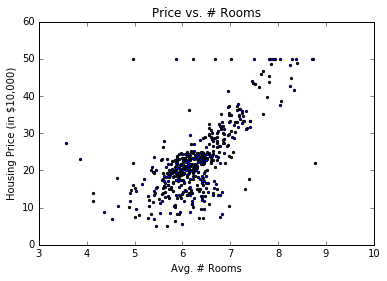

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( bostonDF.RM, bostonDF.PRICE, s=5 )
plt.xlabel( "Avg. # Rooms" )
plt.ylabel( "Housing Price (in $10,000)" )
plt.title( "Price vs. # Rooms")

<h1>Predicting Prices</h1>

In [131]:
lm.predict( X)[0:10]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,
        27.94288232,  25.25940048,  23.00433994,  19.5347558 ,
        11.51696539,  18.91981483])

Plot prediction against real values

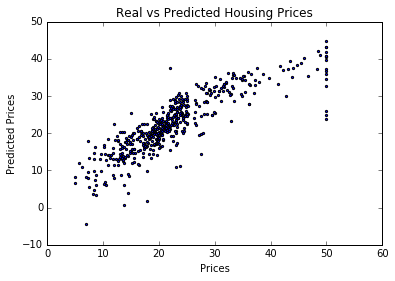

In [137]:
plt.scatter( bostonDF.PRICE, lm.predict(X), s=5 )
plt.xlabel( "Prices")
plt.ylabel( "Predicted Prices")
plt.title( "Real vs Predicted Housing Prices")

Let's compute the mean squared error:


In [139]:
mse = np.mean( (bostonDF.PRICE-lm.predict(X))**2)
print( "Mean squared error = ", mse )

Mean squared error =  21.8977792177


<h2>Training and Validating</h2>



In [142]:
X_train, X_test, y_train, y_test = \
     cross_validation.train_test_split( X,
                                              bostonDF.PRICE,
                                              test_size=0.33,
                                              random_state=5 )
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(339, 13) (167, 13) (339,) (167,)


Building a linear regression model using only the train data:

In [170]:
lm = LinearRegression()
lm.fit( X_train, y_train )

TypeError: fit() got an unexpected keyword argument 'logdir'

In [146]:
pred_train = lm.predict( X_train )
pred_test  = lm.predict( X_test )
print( "mse_train = ", np.mean( (y_train-lm.predict(X_train))**2) )
print( "mse_test  = ", np.mean( (y_test-lm.predict(X_test))**2) )
      

mse_train =  19.5467584735
mse_test  =  28.5413672756


<h2>Plotting the Residuals</h2>

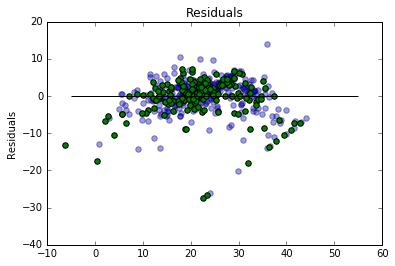

In [164]:
plt.scatter( lm.predict(X_train), lm.predict(X_train) - y_train,
           c ='b', s=30, alpha=0.4 )
plt.scatter( lm.predict(X_test), lm.predict(X_test) - y_test,
           c ='g', s=30 )
plt.hlines( y=0, xmin=-5, xmax=55)
plt.title( "Residuals" )
plt.ylabel( "Residuals" )